# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

# Question 1

In [10]:
import numpy as np

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

#import packages

import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
model = inauguralproject.inauguralproject()

namespace(HF=0.0, HM=0.0, LF=0.5, LM=0.0)
alpha = 0.25 and sigma = 0.5, HF/HM = 0.0000 / 0.0000 = nan


C:\Users\Yas\AppData\Local\Temp\ipykernel_14160\1516699339.py:13: RuntimeWarning: invalid value encountered in double_scalars
  optm[it, jt] = opt.HM/opt.HF
C:\Users\Yas\AppData\Local\Temp\ipykernel_14160\1516699339.py:14: RuntimeWarning: invalid value encountered in double_scalars
  print(f"alpha = {a} and sigma = {s}, HF/HM = {opt.HF:.4f} / {opt.HM:.4f} = {opt.HF/opt.HM:.4f}")


namespace(HF=2.0, HM=6.5, LF=7.0, LM=2.0)
alpha = 0.25 and sigma = 1, HF/HM = 2.0000 / 6.5000 = 0.3077
namespace(HF=0.5, HM=4.0, LF=8.5, LM=5.0)
alpha = 0.25 and sigma = 1.5, HF/HM = 0.5000 / 4.0000 = 0.1250
namespace(HF=0.0, HM=0.0, LF=0.5, LM=0.0)
alpha = 0.5 and sigma = 0.5, HF/HM = 0.0000 / 0.0000 = nan
namespace(HF=4.5, HM=4.5, LF=4.5, LM=4.5)
alpha = 0.5 and sigma = 1, HF/HM = 4.5000 / 4.5000 = 1.0000
namespace(HF=2.5, HM=2.0, LF=6.5, LM=7.0)
alpha = 0.5 and sigma = 1.5, HF/HM = 2.5000 / 2.0000 = 1.2500
namespace(HF=0.0, HM=0.0, LF=0.5, LM=0.0)
alpha = 0.75 and sigma = 0.5, HF/HM = 0.0000 / 0.0000 = nan
namespace(HF=6.5, HM=2.0, LF=2.5, LM=6.5)
alpha = 0.75 and sigma = 1, HF/HM = 6.5000 / 2.0000 = 3.2500
namespace(HF=4.0, HM=0.5, LF=5.0, LM=8.5)
alpha = 0.75 and sigma = 1.5, HF/HM = 4.0000 / 0.5000 = 8.0000
[[       nan 3.25       8.        ]
 [       nan 1.         0.8       ]
 [       nan 0.30769231 0.125     ]]


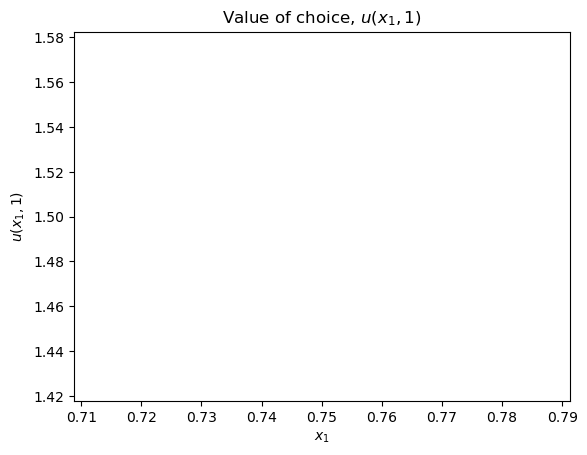

In [21]:
#create list with new values of alpha and solve
al = [0.25, .5, .75]

#create list with new values of sigma and solve
sl = [0.5, 1, 1.5]

optm = np.zeros([3,3])

for it, a in enumerate(al):
    model.par.alpha = a

    for jt, s in enumerate(sl):

        model.par.sigma = s
        opt = model.solve_discrete()

        print(opt)
        optm[it, jt] = opt.HM/opt.HF


        print(f"alpha = {a} and sigma = {s}, HF/HM = {opt.HF:.4f} / {opt.HM:.4f} = {opt.HF/opt.HM:.4f}")

print(optm)


#plot the results 

#store results
res_HF = {}
res_HM = {}
res_HFHM = {}

res_HF = opt.HF
res_HM = opt.HM
res_HFHM = optm

# a. create the figure
fig = plt.figure()

# b. plot
ax = fig.add_subplot(1,1,1)

ax.plot(model.par.alpha, model.par.sigma)

ax.set_title('Value of choice, $u(x_1,1)$')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$u(x_1,1)$');               





# Question 2

Explain your code and procedure

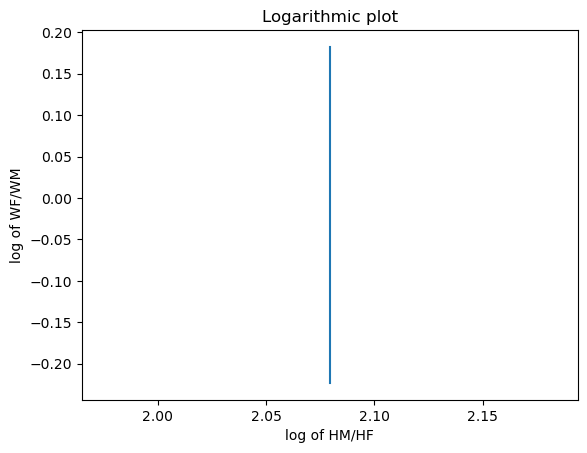

In [8]:
import numpy as np
from types import SimpleNamespace
from inauguralproject import inauguralproject

#create list with new values of WF
wF_values = np.array([0.8, 0.9, 1.0, 1.1, 1.2])

#Define log of wf/wm as an array 
ratio_wf_wm = [num / model.par.wM for num in wF_values]
log_WF_WM = np.log(ratio_wf_wm)
    

#define Hf/Hm and convert to an Array S
ratio_hf_hm = opt.HF/opt.HM
log_HF_HM = np.log(ratio_hf_hm)
arr_hf_hm = np.array([])
for i in range(5):
    arr_hf_hm = np.append(arr_hf_hm, log_HF_HM)

# plot 
plt.plot(arr_hf_hm,log_WF_WM)

# Set plot labels and title
plt.xlabel('log of HM/HF')
plt.ylabel('log of WF/WM')
plt.title('Logarithmic plot')

plt.show()

In [46]:
arr_hf_hm


array([2.07944154, 2.07944154, 2.07944154, 2.07944154, 2.07944154])

# Question 3

Explain your code and procedure

In [12]:
def solve(self, do_print=False):
    """ solve model continously """

    par = self.par
    sol = self.sol

    # a. objective function
    def obj(HF):
        HM = optimize.minimize_scalar(lambda HM: -self.calc_utility(HM+HF*par.alpha/(1-par.alpha),HM,HF-par.alpha/(1-par.alpha)*HM,HF),
                                      bounds=(1e-8,24), method='bounded').x
        LM = 24 - HM
        LF = 24 - HF
        return np.log(HF/HM)

    # b. solve for different values of wF
    for i, wF in enumerate(par.wF_vec):
        par.wF = wF
        sol.HF_vec[i] = optimize.minimize_scalar(lambda HF: -obj(HF), bounds=(1e-8,24), method='bounded').x
        sol.HM_vec[i] = optimize.minimize_scalar(lambda HM: -self.calc_utility(HM+sol.HF_vec[i]*par.alpha/(1-par.alpha),HM,sol.HF_vec[i]-par.alpha/(1-par.alpha)*HM,sol.HF_vec[i]),
                                                  bounds=(1e-8,24), method='bounded').x
        sol.LM_vec[i] = 24 - sol.HM_vec[i]
        sol.LF_vec[i] = 24 - sol.HF_vec[i]

    # c. print results
    if do_print:
        for i, wF in enumerate(par.wF_vec):
            print(f"wF = {wF:.2f}, HF = {sol.HF_vec[i]:.4f}, HM = {sol.HM_vec[i]:.4f}")

    

In [ ]:

# plot results


ADD CONCISE CONLUSION.

Question 4 

In [16]:
#choose alpha such that M and W are equally productive
model.par.alpha = 0.5

Question 5